In [23]:
import os
current_path = os.getcwd()
folder = "MA"
path =  folder.join(current_path.split(folder)[:-1])+folder
os.chdir(path)

In [24]:
import numpy as np
import statistics
from Repair.Screen.globallp import LPconstrainedAE
from matplotlib import pyplot as plt

plt.rcParams.update({

    "pgf.texsystem": "pdflatex",
    'font.family': 'serif',
    'text.usetex': True,
    'pgf.rcfonts': False,
})

In [25]:
def screen(x, w, smax, smin=None, timestamps=None):
    if timestamps is None:
        timestamps = np.arange(len(x))
    assert len(x) == len(timestamps)

    if smin is None:
        smin = -smax

    t = timestamps
    x_prime = x.copy()
    for k, x_k in enumerate(x):
        X_min, X_max = [], []

        x_min = -np.inf if k == 0 else x_prime[k - 1] + smin * (t[k] - t[k - 1])
        x_max = +np.inf if k == 0 else x_prime[k - 1] + smax * (t[k] - t[k - 1])
        print("x_min",x_min)
        print("x_max",x_max)
        for i in range(k+1,len(x)):
            if t[i] > t[k] + w:
                break
            X_min.append(x[i] + smin * (t[k] - t[i]))
            X_max.append(x[i] + smax * (t[k] - t[i]))

        print("X_max",X_max)
        print("X_min",X_min)

        x_mid = statistics.median(X_min+X_max+ [x_k])
        print("x_mid" , x_mid)

        if x_max < x_mid:
            x_prime[k] = x_max
        elif x_min > x_mid:
            x_prime[k] = x_min
        else:
            x_prime[k] = x_mid
        print(k,x_max,x_min,x_mid,x_k)
    return x_prime



In [26]:
%%capture
x = [5, 4.5, 6, 11, 5.5,4,9,7 ,8,8.5,7,6,6.5 ,13 , 4, 5, 5,5.5,6.5,-4,6,  7,]
smax= 2
w = 1

x_prime = screen(x, w, smax)
print(x_prime)
#def LPconstrainedAE(x, min=2, max=2, time=None, w=1, second=True , labels = None , truth = None):

x_lp = LPconstrainedAE(np.array(x),min=smax,max=smax,w=w)
print(x_lp)
x_lp

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


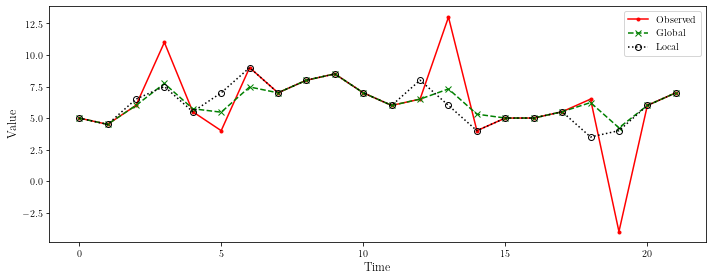

[5, 4.5, 6.5, 7.5, 5.5, 7, 9, 7, 8, 8.5, 7, 6, 8, 6, 4, 5, 5, 5.5, 3.5, 4, 6, 7]
[5.         4.5        6.         7.73890482 5.73890482 5.46420306
 7.46420306 7.         8.         8.5        7.         6.
 6.5        7.3074178  5.3074178  5.         5.         5.5
 6.22598631 4.22598631 6.         7.        ]


In [27]:
plt.figure(figsize=(10,4))
plt.plot(x , color= "red" , label="Observed" ,marker=".")
plt.plot(x_lp , color= "green" , label="Global",marker="x",ls="dashed")
plt.plot(x_prime, color= "black" , label="Local",marker="o",ls="dotted" ,fillstyle='none')
plt.legend()
plt.xlabel("Time", fontsize=12)
plt.ylabel("Value", fontsize=12)
plt.tight_layout()

plt.savefig("thesisplots/screen_example2.eps")
plt.show()



print(x_prime)
print(x_lp)


In [28]:
X = [(1,5),(2,4.5),(3,6),(4,11),(5,5.5),(6,4),(7,9),(8,7)]
x = np.array([x[1] for x in X])
x_prime = [5,4.5,6,7.5,5.5,4,6,7]

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


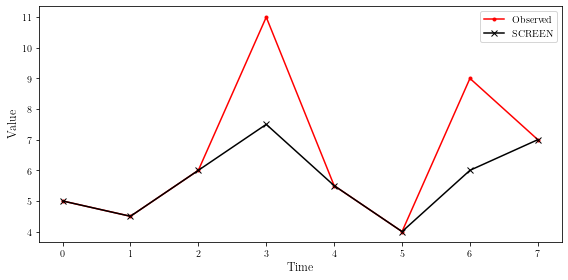

In [29]:
plt.figure(figsize=(8,4))
plt.plot(x , color= "red" , label="Observed" ,marker=".")
plt.plot(x_prime , color= "black" , label="SCREEN",marker="x")
plt.legend()

plt.xlabel("Time", fontsize=12)
plt.ylabel("Value", fontsize=12)
plt.tight_layout()

plt.savefig("thesisplots/screen_example1.eps")
plt.show()

plt.figure(figsize=(10,4))
plt.plot(x , color= "black" , label="original" ,marker=".")
plt.plot(x_prime, color= "black" , label="local",marker="o",ls="dotted" ,fillstyle='none')

mask = x[1:]-x[:1] > 2
violations = np.zeros(len(x),dtype=bool)
for m in np.arange(len(x))[mask]:
    plt.plot([m,m+1] , x[m:m+1] , color= "red" , label="original" ,marker=".")
